# Stevan Zlojutro - April 13, 2021

# Case Study: Junior Data Scientist 

You are a Data Scientist for Wine Corp. Wine Corp is a leading retailer for wines in the United States. The company has long depended on brick and mortar stores but is exploring avenues to grow its online revenue. Specifically, Wine Corp is creating a subscription service for its wines. To facilitate adoption, and differentiate themselves in the market, they want to develop a recommender system to recommend wines based on other wines that a customer has enjoyed. You have been tasked with prototyping a recommender system.

This Jupyter Notebook file is pre-populated with functions that can be used to generate a recommender system. Please record your answers in this Notebook file and upload to a private GitHub repository. Please add “harnson” to the private GitHub repo. 

## Part 1
####  We have provided an adapted version of a publicly available dataset, scraped from WineEnthusiast. Perform basic Exploratory Data Analysis (EDA) on this data and summarize your observations.
#### Explore 2-3 aspects of the dataset. Communicate key observations with appropriate data visualizations.
#### Show all work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first, import the data set 
df_path = 'wine_data_set.csv' ## fill in with your path for the wine data set
df = pd.read_csv(df_path)

In [3]:
df.describe()

,wine_idx,points,price
count,10000.00000,10000.000000,9257.000000
mean,4999.50000,88.454800,34.340391
std,2886.89568,3.014244,42.126092
min,0.00000,80.000000,-24.000000
25%,2499.75000,86.000000,16.000000
50%,4999.50000,88.000000,25.000000
75%,7499.25000,91.000000,42.000000
max,9999.00000,100.000000,1000.000000


In [4]:
# changing all negative prices to positive
# fill all NaN prices with the average price

df['price'] = df['price'].abs()
df['price'] = df['price'].fillna(34.34)

In [5]:
df.isnull().sum()

wine_idx                    0
country                     3
description                 0
designation              2933
points                      0
price                       0
province                    3
region_1                 1596
region_2                 6042
taster_name              2031
taster_twitter_handle    2408
title                       0
variety                     0
winery                      0
dtype: int64

In [6]:
df.nunique()

wine_idx                 10000
country                     34
description               9943
designation               5349
points                      21
price                      188
province                   238
region_1                   737
region_2                    17
taster_name                 18
taster_twitter_handle       14
title                     9933
variety                    348
winery                    5531
dtype: int64

In [7]:
df.head(3)

,wine_idx,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Spain,"With damp earth and crusty leather aromas, thi...",RSV 1601 El Duque de Lerma,88,75.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Real Sitio de Ventosilla 2004 RSV 1601 El Duqu...,Tempranillo,Real Sitio de Ventosilla
1,1,US,A really nice sparkling wine from Gloria Ferre...,Brut Rosé,91,42.0,California,Carneros,Napa-Sonoma,NaN,NaN,Gloria Ferrer 2007 Brut Rosé Sparkling (Carneros),Sparkling Blend,Gloria Ferrer
2,2,US,"Mostly Cabernet, with a bit of Merlot and Malb...",Electrum,90,65.0,Washington,Red Mountain,Columbia Valley,Paul Gregutt,@paulgwine,Obelisco Estate 2009 Electrum Cabernet Sauvign...,Cabernet Sauvignon,Obelisco Estate


In [8]:
df['country/province'] = df['country'] + ' - ' + df['province']

As points seem to increase, so too does the price steadily increase (except where the trend does not seem to continue equal to and greater than 97 points)

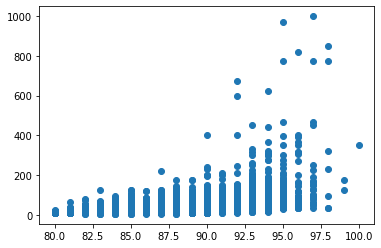

In [9]:
plt.scatter(df['points'], df['price'])

## Part 2

#### Below are two sets of functions that can be used to calculate the similarity of two strings, based on the following articles: 
•	https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

•	https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50


In [10]:
# Jaccard Similarity

def get_jaccard_sim(str1, str2): 
    # this function computes the jaccard similarity between two strings
    # str1 and str2
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

#### You may choose to use either of the two methods above or engineer your own to prototype a recommender system to select the top 5 most similar wines to the client’s favorite wine, indicated below. Show your work and please list any assumptions you make. You may use any attributes within the data to facilitate recommendations. 

In [11]:
favorite = df.iloc[37]
favorite

wine_idx                                                                37
country                                                             France
description              Firm and structured, this still shows much of ...
designation                                                            NaN
points                                                                  94
price                                                                34.34
province                                                          Burgundy
region_1                                                  Grands-Echezeaux
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                            Henri de Villamont 2014  Grands-Echezeaux
variety                                                         Pinot Noir
winery                   

In [13]:
# the client's favorite wine and its description

favorite = df.iloc[37]
favorite_wine_description = df.iloc[37, 2]
favorite_wine_country_providence = df.iloc[37, 14]
favorite_wine_variety = df.iloc[37, 12]
favorite_wine_price = df.iloc[37, 5]

In [14]:
# Jaccard Similarity

wine_similarity_df = pd.DataFrame(columns=['wine_idx',
                                           'description_similarity_score',
                                           'country_providence_similarity_score',
                                           'variety_similarity_score',
                                           'price_similarity_score'])

for x in range(1000):
    wine_similarity_df.loc[x] = [int(x),
                                 get_jaccard_sim(favorite_wine_description, df.iloc[x, 2]),
                                 get_jaccard_sim(favorite_wine_country_providence, df.iloc[x, 14]),
                                 get_jaccard_sim(favorite_wine_variety, df.iloc[x, 12]),
                                 (favorite_wine_price - df.iloc[x, 5]) / favorite_wine_price]

In [15]:
wine_similarity_df['score_sum'] = wine_similarity_df['description_similarity_score'] + \
                                  wine_similarity_df['country_providence_similarity_score'] + \
                                  wine_similarity_df['variety_similarity_score'] + \
                                  wine_similarity_df['price_similarity_score']

In [16]:
wine_similarity_df

,wine_idx,description_similarity_score,country_providence_similarity_score,variety_similarity_score,price_similarity_score,score_sum
0,0.0,0.156250,0.2,0.0,-1.184042,-0.827792
1,1.0,0.093750,0.2,0.0,-0.223063,0.070687
2,2.0,0.118644,0.2,0.0,-0.892836,-0.574192
3,3.0,0.121212,0.2,0.0,-1.620850,-1.299638
4,4.0,0.070588,0.2,0.0,-1.038439,-0.767851
...,...,...,...,...,...,...
995,995.0,0.080645,0.2,1.0,-1.184042,0.096603
996,996.0,0.120690,0.2,0.0,0.271986,0.592676
997,997.0,0.071429,0.2,0.0,0.504950,0.776379
998,998.0,0.089552,0.4,0.0,-0.077461,0.412092


The 5 recommended wines would be the wines with index numbers: 201, 867, 430, 661, 982 (in that order)

In [17]:
recommended_wines = wine_similarity_df[['score_sum']]

recommended_wines = recommended_wines.sort_values(by='score_sum', ascending=False)

recommended_wines.head(6)

,score_sum
37,3.000000
201,2.514363
867,2.450227
430,2.147523
661,2.070175
982,1.970771


## Part 3 

#### Client A is on a tight budget and does not want to spend more than $20. She also is interested in expanding her tastes and would like recommendations that do not include Pinot Noirs. Give the top 5 recommendations that meet these criteria. 

In [18]:
# show work here. Use as many cells as needed

df_special_request = df[(df['price'] <= 20) & (df['variety'] != 'Pinot Noir')]

In [19]:
# Jaccard Similarity

wine_similarity_df = pd.DataFrame(columns=['wine_idx',
                                           'description_similarity_score',
                                           'country_providence_similarity_score',
                                           'variety_similarity_score',
                                           'price_similarity_score'])

for x in range(1000):
    wine_similarity_df.loc[x] = [int(x),
                                 get_jaccard_sim(favorite_wine_description, df_special_request.iloc[x, 2]),
                                 get_jaccard_sim(favorite_wine_country_providence, df_special_request.iloc[x, 14]),
                                 get_jaccard_sim(favorite_wine_variety, df_special_request.iloc[x, 12]),
                                 (favorite_wine_price - df_special_request.iloc[x, 5]) / favorite_wine_price]
    
wine_similarity_df['score_sum'] = wine_similarity_df['description_similarity_score'] + \
                                  wine_similarity_df['country_providence_similarity_score'] + \
                                  wine_similarity_df['variety_similarity_score'] + \
                                  wine_similarity_df['price_similarity_score']

The 5 recommended wines would be the wines with index numbers: 142, 201, 601, 134, 228 (in that order)

In [20]:
recommended_wines = wine_similarity_df[['score_sum']]

recommended_wines = recommended_wines.sort_values(by='score_sum', ascending=False)

recommended_wines.head(5)

,score_sum
142,2.147523
201,1.775553
601,1.638284
134,1.610445
228,1.599407


## Part 4 

#### Assess the performance of your recommender. Is it providing reasonable recommendations? Why or why not?

I believe that my recommender is providing reasonable results given that it takes into account a wine's variety, its description, its country/providence, and its price prior to providing a recommendation.